# Importing all the right functions

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading in the COLVAR file

### File is too large to put on Github:((((((((((((
Holler at me if you want it some other way (hyak)

In [54]:
data=pd.read_csv('files/combined2',delim_whitespace=True,header=0,skipfooter=1,skipinitialspace=True,names=['Time','d','uwall.bias','uwall.force2','metad.bias','metad.rbias','ct','metad.work'])
#data['ct'] = data['ct'].str.replace('"', '')
data.index = range(len(data))
data.head()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,Time,d,uwall.bias,uwall.force2,metad.bias,metad.rbias,ct,metad.work
0,0.00,2.449492,0.0,0.0,0.0,0.0,0.0,0.0
1,0.05,2.464044,0.0,0.0,0.0,0.0,0.0,0.0
2,0.10,2.475866,0.0,0.0,0.0,0.0,0.0,0.0
3,0.15,2.485656,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,2.493736,0.0,0.0,0.0,0.0,0.0,0.0


# Assigning weights to each line
names=['Time','d','uwall.bias','uwall.force2','metad.bias','metad.rbias','ct','metad.work']

In [55]:
expt=[]
wt=[]
for i in range(len(data)):
    
    x=data['metad.bias'].iloc[i]
    y=float(data['ct'].iloc[i])
    expt.append(np.exp(x-y+47))

data['e(v-ct)']=expt
data.head(3)

,Time,d,uwall.bias,uwall.force2,metad.bias,metad.rbias,ct,metad.work,e(v-ct)
0,0.00,2.449492,0.0,0.0,0.0,0.0,0.0,0.0,2.581313e+20
1,0.05,2.464044,0.0,0.0,0.0,0.0,0.0,0.0,2.581313e+20
2,0.10,2.475866,0.0,0.0,0.0,0.0,0.0,0.0,2.581313e+20


In [56]:
np.min(data['e(v-ct)']), np.max(data['e(v-ct)'])
np.sum(data['e(v-ct)'])

1.033435352350353e+29

# Defining the histogram function

In [112]:
def making_histogram(distance, weights):
    ending=5.0;bins=500; binsize=(ending)/bins
    hist=np.zeros((bins,2),dtype=np.float64)

    for i in range(bins):
        hist[i][0] = binsize/2.0 + i*binsize

    for i in range(len(distance)):
        hist[int(distance.iloc[i]/binsize)][1] += weights.iloc[i]
    hist[:,1] = -2.5*np.log(hist[:,1]/np.sum(weights))
    return(hist)



# Trying to reproduce the original curve

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


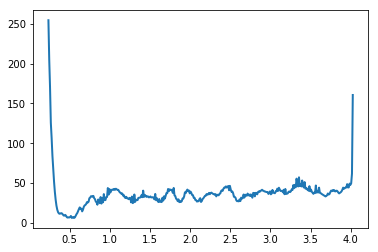

In [58]:
yoyo= making_histogram(data['d'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

# Reading in new distances

In [74]:
distances=pd.read_csv('files/DISTANCES',delim_whitespace=True,header=0,skipfooter=1,skipinitialspace=True)
distances.head(5)
#distances['d_NdeNd'].head(5)


/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,time,d_NdeSNa,d_NdeNde,d_NdeC5,d_NdeNd,d_SNaSNa,d_SNaC5,d_SNaNd,d_C5Nd,d_C5C5,d_NdNd
0,0.0,2.255838,2.449490,2.477187,1.970582,2.449490,2.651968,2.167794,2.045269,2.449490,2.449490
1,1.0,2.501149,2.714331,2.558107,2.274988,2.596044,2.624940,2.377503,2.219238,2.417935,2.638048
2,2.0,2.485137,2.669218,2.528556,2.296329,2.596834,2.611996,2.416272,2.261303,2.413523,2.680465
3,3.0,2.339771,2.550815,2.342746,2.143672,2.388116,2.359647,2.199344,1.992171,2.114991,2.484228
4,4.0,2.144238,2.366750,2.130689,1.962437,2.167344,2.116409,2.004320,1.781842,1.848958,2.271782


In [87]:
print(int(distances['d_NdeNd'].iloc[9590]/(4.5/450)))

450


/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


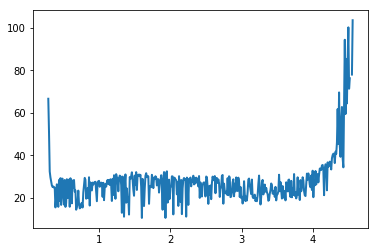

In [113]:
yoyo= making_histogram(distances['d_NdeNd'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


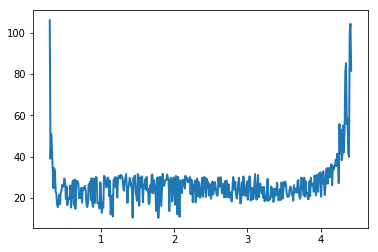

In [92]:
yoyo= making_histogram(distances['d_NdeSNa'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


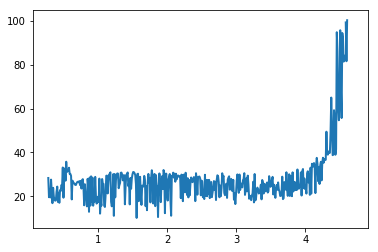

In [93]:
yoyo= making_histogram(distances['d_NdeNde'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


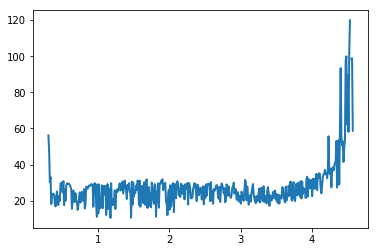

In [94]:
yoyo= making_histogram(distances['d_NdeC5'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


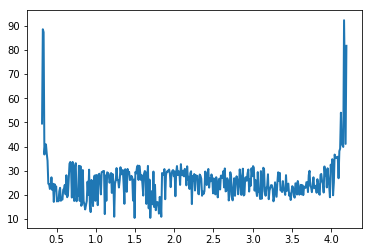

In [95]:
yoyo= making_histogram(distances['d_SNaSNa'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


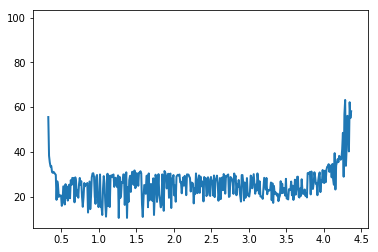

In [96]:
yoyo= making_histogram(distances['d_SNaC5'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


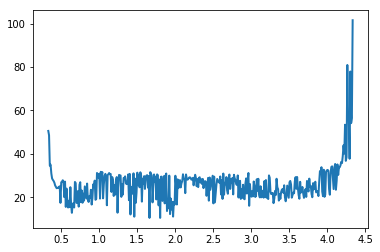

In [97]:
yoyo= making_histogram(distances['d_SNaNd'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


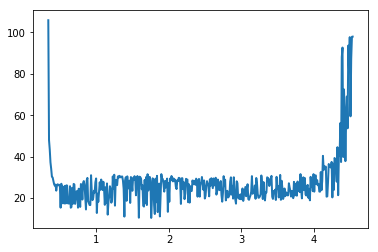

In [98]:
yoyo= making_histogram(distances['d_C5Nd'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


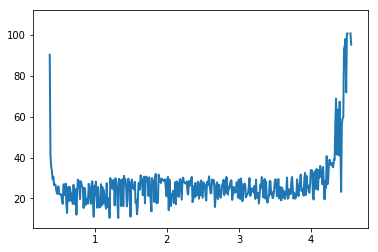

In [100]:
yoyo= making_histogram(distances['d_C5C5'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()

/Users/garrett/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in log


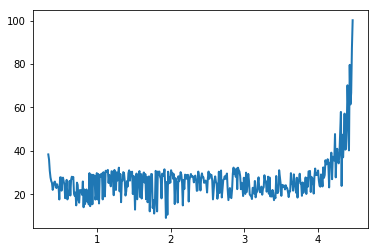

In [101]:
yoyo= making_histogram(distances['d_NdNd'], data['e(v-ct)'])
plt.plot(yoyo[:,0],yoyo[:,1], lw=2)
plt.show()